<a href="https://colab.research.google.com/github/Ananyajainhdjsj/Dropout-Students-Prediction-project/blob/master/dropout(with_imbaalnce%2Bone_o_p).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier

In [18]:
# Upload the file manually in Google Colab
from google.colab import files
uploaded = files.upload()

# Load the dataset
dataset = pd.read_excel('/content/dataset.xlsx')


Saving dataset.xlsx to dataset.xlsx


In [19]:
# Get basic info about the dataset
dataset.info()

# Check the first few rows
dataset.head()

# Drop irrelevant columns
dataset = dataset.drop(columns=['ID', 'Nacionality', 'Inflation.rate', 'GDP', 'displaced'], errors='ignore')

# Drop rows with NaN values
dataset = dataset.dropna()

# Reduce the sample size for faster processing (optional)
dataset = dataset.sample(n=500, random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

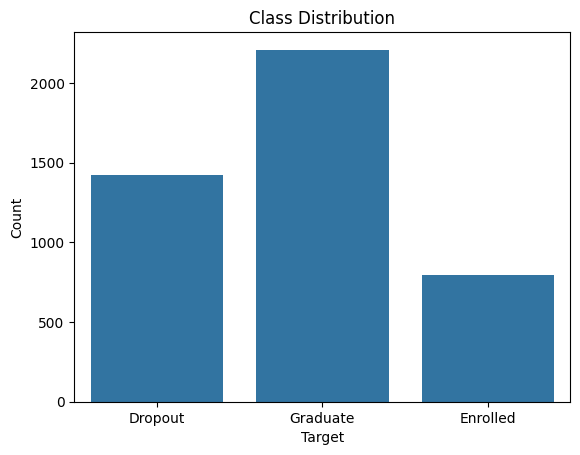

In [37]:
# Class distribution
sns.countplot(x='Target', data=dataset)
plt.title('Class Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


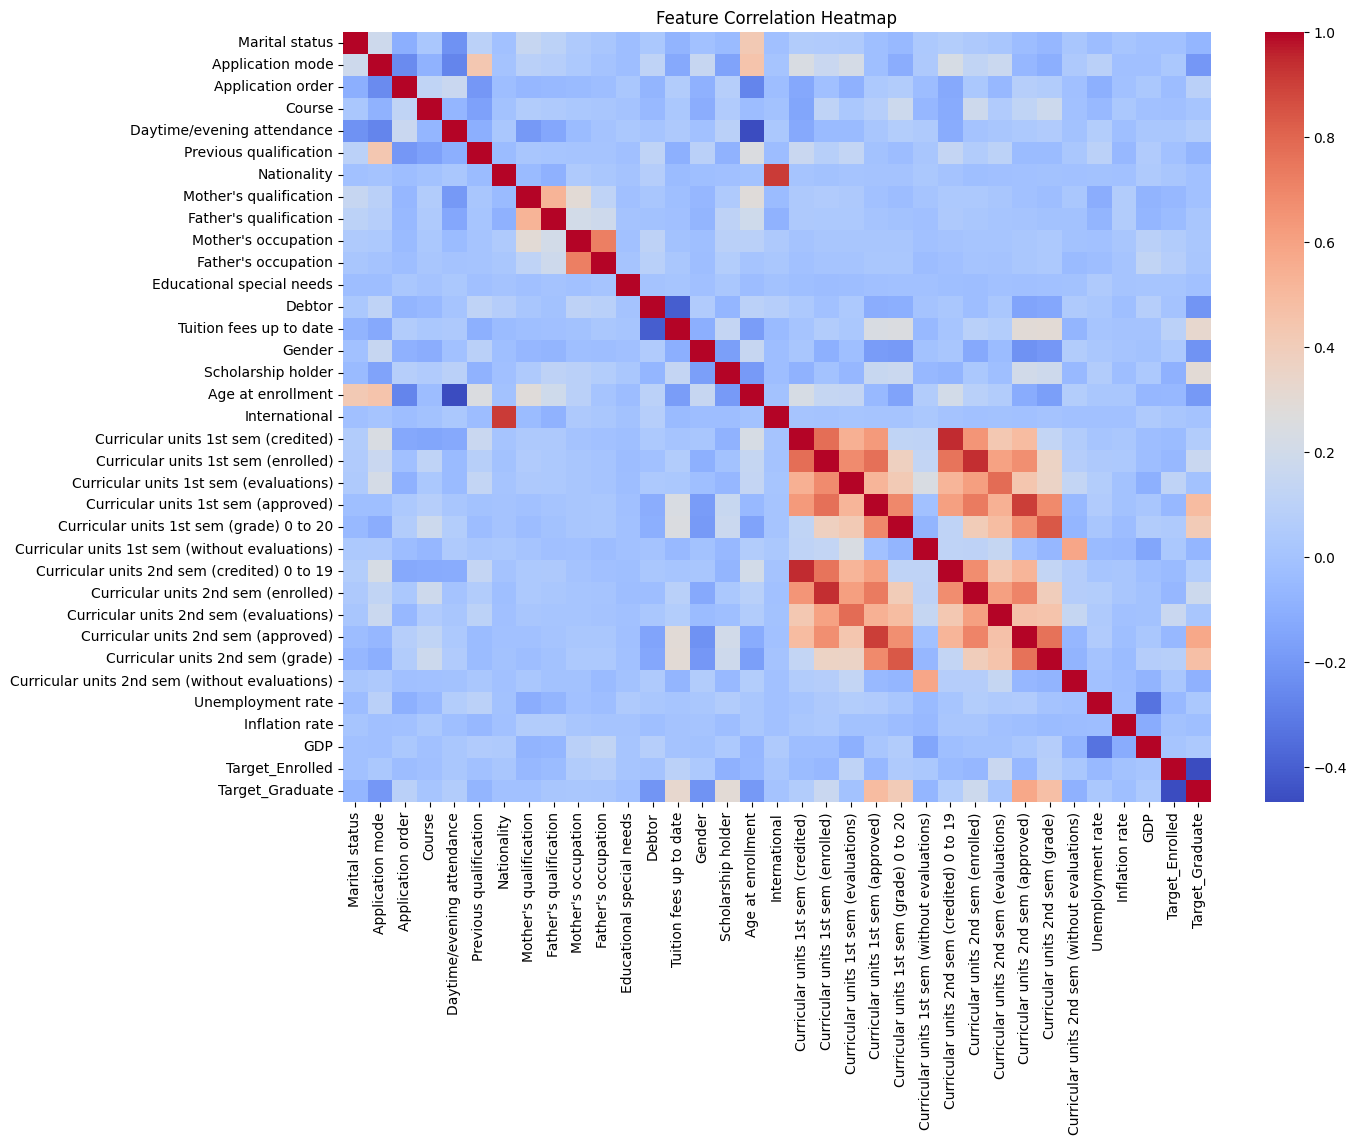

In [38]:
# Convert categorical variables to dummy variables
encoded_dataset = pd.get_dummies(dataset, drop_first=True)

# Correlation heatmap
plt.figure(figsize=(14,10))
correlation_matrix = encoded_dataset.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [22]:
# Split Target and Features BEFORE Encoding
y = dataset['Target']
X = dataset.drop(columns=['Target'])


In [23]:
# Convert categorical variables in Features to dummy variables
X = pd.get_dummies(X, drop_first=True)


In [24]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [25]:
# Train the RandomForest Model training model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [26]:
# Predictions
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)



              precision    recall  f1-score   support

     Dropout       0.85      0.77      0.81        52
    Enrolled       0.55      0.24      0.33        25
    Graduate       0.76      0.96      0.85        73

    accuracy                           0.77       150
   macro avg       0.72      0.66      0.66       150
weighted avg       0.76      0.77      0.75       150

Model Accuracy: 0.7733333333333333


In [27]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.85      0.77      0.81        52
    Enrolled       0.55      0.24      0.33        25
    Graduate       0.76      0.96      0.85        73

    accuracy                           0.77       150
   macro avg       0.72      0.66      0.66       150
weighted avg       0.76      0.77      0.75       150



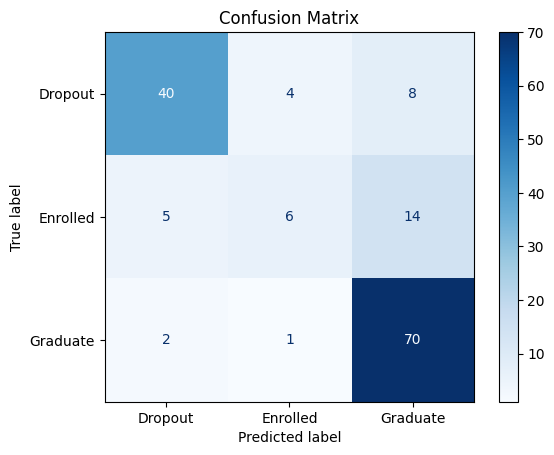

In [28]:
# Confusion Matrix Visualization
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


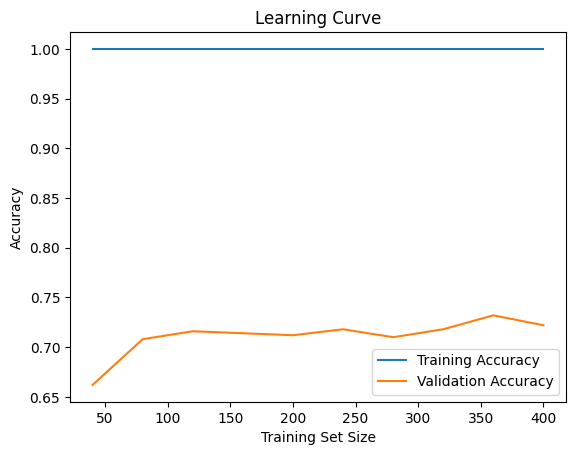

In [29]:
# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


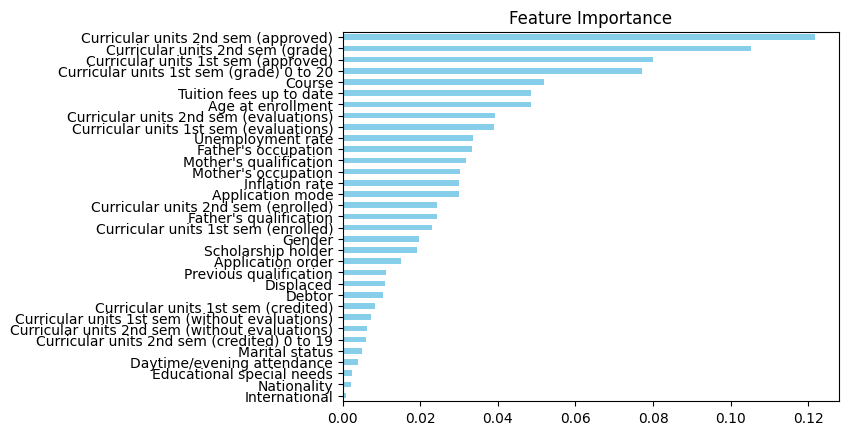

In [30]:
# Feature Importance Visualization
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importance')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


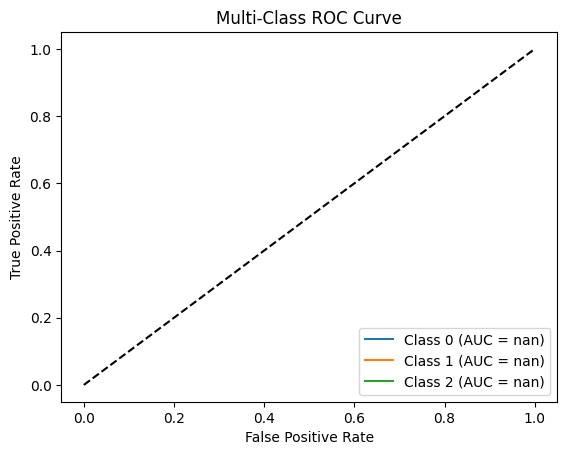

In [39]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier

# Binarize the target variable for multi-class ROC
y_bin = label_binarize(y_test, classes=['Dropout', 'Enrolled', 'Graduate'])
n_classes = y_bin.shape[1]

# Train the model in One-vs-Rest fashion
ovr_model = OneVsRestClassifier(RandomForestClassifier(random_state=42))
ovr_model.fit(X_train, pd.get_dummies(y_train))
y_score = ovr_model.predict_proba(X_test)

# Plot ROC Curves for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {model.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [34]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Re-initialize Label Encoder and fit on the original target column
# Make sure y is defined as your original target column before encoding
le = LabelEncoder()
le.fit(y)  # y should be the original target column before encoding

# Sample input for prediction (Replace values with your test case)
new_data = {
    'Age': [20],
    'Education': [12],
    'Income': [30000],
    'Gender_Male': [1],  # Use 1 for Male, 0 for Female (example)
    'Target_Enrolled': [0],  # Adjust based on encoded columns
    'Target_Graduate': [0]   # Adjust based on encoded columns
}

# Convert to DataFrame
new_df = pd.DataFrame(new_data)

# Ensure new_df has the same columns as X
missing_cols = set(X.columns) - set(new_df.columns)
for col in missing_cols:
    new_df[col] = 0  # Add missing columns with zeros

# Reorder columns to match the training set
new_df = new_df[X.columns]

# Make prediction
prediction = model.predict(new_df)

# Check the classes known to Label Encoder
print("Known classes:", le.classes_)

# Check the model's prediction
print("Model Prediction:", prediction)

# Convert prediction to numeric form using the class index
predicted_class = prediction[0]
predicted_class_index = list(le.classes_).index(predicted_class)

# Decode prediction to original labels
predicted_label = le.inverse_transform([predicted_class_index])
print("Predicted Outcome:", predicted_label[0])



Known classes: ['Dropout' 'Enrolled' 'Graduate']
Model Prediction: ['Dropout']
Predicted Outcome: Dropout


Confusion Matrix:
 [[346  30  65]
 [ 62  79 104]
 [ 19  26 597]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80       441
           1       0.59      0.32      0.42       245
           2       0.78      0.93      0.85       642

    accuracy                           0.77      1328
   macro avg       0.72      0.68      0.69      1328
weighted avg       0.75      0.77      0.75      1328


Accuracy Score: 0.7695783132530121


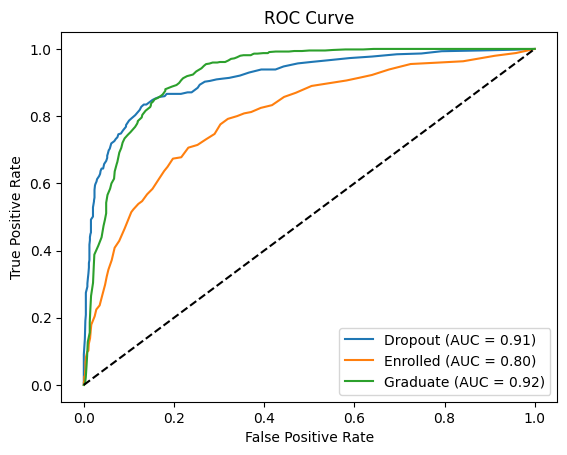

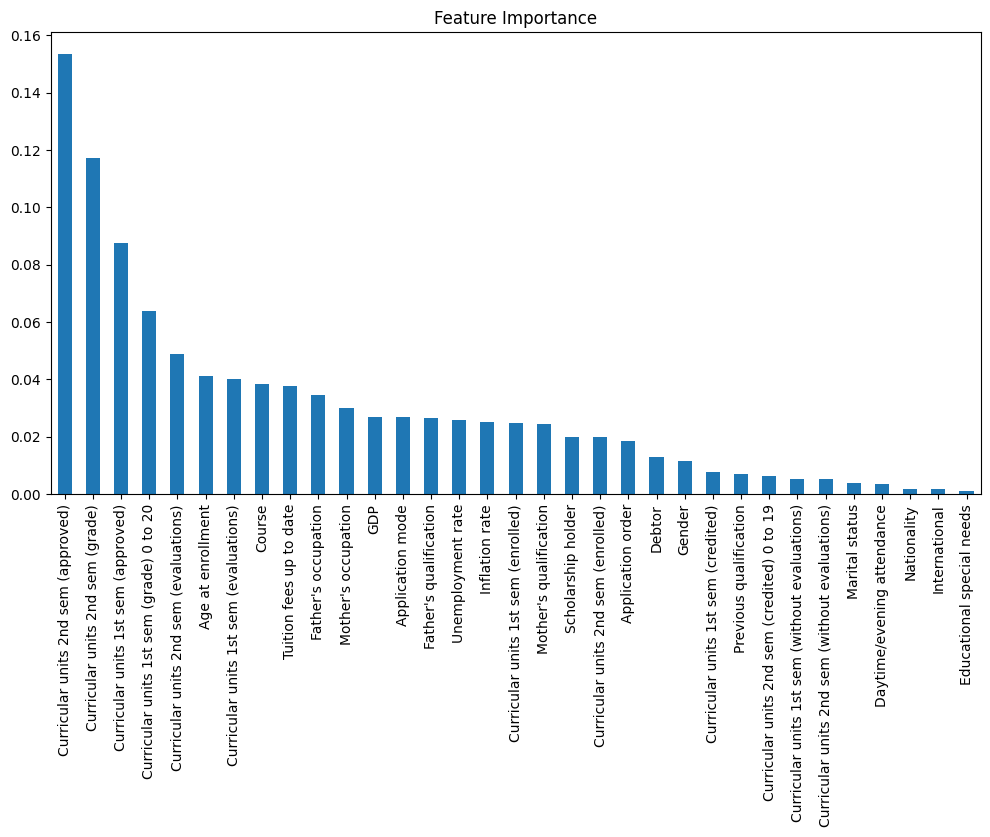


Scenario 1: High performance, likely to enroll
Predicted Outcome: Dropout

Scenario 2: Low performance, at risk of dropout
Predicted Outcome: Dropout

Scenario 3: Moderate performance, possible graduate
Predicted Outcome: Dropout


In [35]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load dataset
dataset = pd.read_excel('/content/dataset.xlsx')
# Drop unnecessary columns (adjust as per your dataset)
dataset = dataset.drop(['Displaced'], axis=1, errors='ignore')

# Encode categorical target
le = LabelEncoder()
y = dataset['Target']
y_encoded = le.fit_transform(y)  # Encode target

# Drop the original target column and create feature matrix
X = dataset.drop('Target', axis=1)
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Plot ROC Curve for each class
y_prob = model.predict_proba(X_test)
for i, class_label in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    plt.plot(fpr, tpr, label=f'{class_label} (AUC = {roc_auc_score(y_test == i, y_prob[:, i]):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature Importance Plot
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
feature_importances.plot(kind='bar', figsize=(12, 6), title='Feature Importance')
plt.show()

# Scenario Testing
scenarios = [
    {
        'description': 'Scenario 1: High performance, likely to enroll',
        'Age': [20],
        'Education': [12],
        'Income': [30000],
        'Gender_Male': [1],  # 1 for Male, 0 for Female
        'Target_Enrolled': [0],
        'Target_Graduate': [0]
    },
    {
        'description': 'Scenario 2: Low performance, at risk of dropout',
        'Age': [22],
        'Education': [10],
        'Income': [15000],
        'Gender_Male': [0],
        'Target_Enrolled': [0],
        'Target_Graduate': [0]
    },
    {
        'description': 'Scenario 3: Moderate performance, possible graduate',
        'Age': [21],
        'Education': [11],
        'Income': [25000],
        'Gender_Male': [1],
        'Target_Enrolled': [0],
        'Target_Graduate': [0]
    }
]

# Make predictions for each scenario
for scenario in scenarios:
    print("\n" + scenario['description'])

    # Convert to DataFrame
    scenario_df = pd.DataFrame({key: value for key, value in scenario.items() if key != 'description'})

    # Ensure new_df has the same columns as X
    missing_cols = set(X.columns) - set(scenario_df.columns)
    for col in missing_cols:
        scenario_df[col] = 0
    scenario_df = scenario_df[X.columns]


    prediction = model.predict(scenario_df)


    predicted_label = le.inverse_transform(prediction)
    print("Predicted Outcome:", predicted_label[0])


In [36]:
# Check class distribution
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(le.inverse_transform(unique), counts))
print("Class Distribution in Training Set:", class_distribution)


Class Distribution in Training Set: {'Dropout': 980, 'Enrolled': 549, 'Graduate': 1567}


till now this model is imbalanced thats why mostly dropout is predicted